In [69]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Laboratory work 2

In [70]:
df = pd.read_csv('global_preprocessed.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

Shape of the database

In [71]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 171280 rows.
The DataFrame has 26 columns.


,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,-2.952239,0,0.095379,0.000000,-0.048337,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.952239,0,0.000000,0.000000,0.290024,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.952239,0,0.095379,0.000000,-0.048337,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.952239,0,0.000000,0.000000,-0.048337,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171275,0.605588,0,0.095379,0.056697,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171276,0.605588,0,0.190758,0.198440,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171277,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171278,0.605588,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The DataFrame (extended == 0) has 7939 rows.
The DataFrame (extended > 0) has 7939 rows.


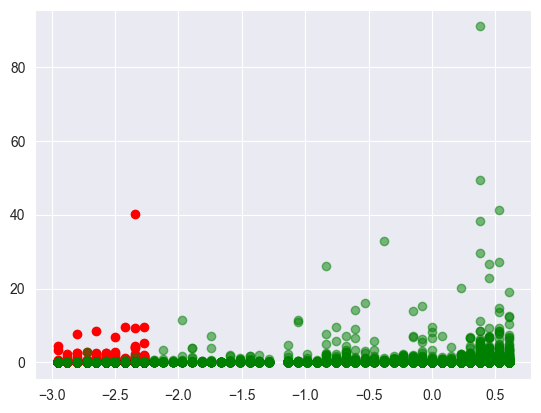

In [72]:

df1 = df[df.extended>0]
row_count = df1.shape[0]
df0 = df[df.extended==0][:row_count]
row_count = df0.shape[0]
print(f'The DataFrame (extended == 0) has {row_count} rows.')
print(f'The DataFrame (extended > 0) has {row_count} rows.')
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

In [73]:
df_new = pd.concat([df0, df1])
df = df_new
df

,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,-2.952239,0,0.095379,0.0,-0.048337,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.952239,0,0.000000,0.0,0.290024,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-2.952239,0,0.095379,0.0,-0.048337,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.952239,0,0.000000,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.952239,0,0.000000,0.0,-0.048337,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171212,0.605588,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171221,0.605588,1,0.000000,0.0,0.048337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171227,0.605588,1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171245,0.605588,1,0.476895,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. Model training and parameter selection using Grid Search

In [74]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

a. K-nearest neighbors (KNN)

In [75]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [76]:
knn.score(x_test.values, y_test.values)

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9604534005037784

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

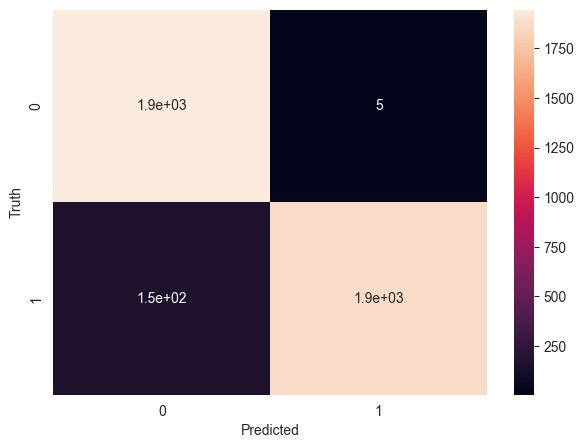

In [77]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1950
           1       1.00      0.92      0.96      2020

    accuracy                           0.96      3970
   macro avg       0.96      0.96      0.96      3970
weighted avg       0.96      0.96      0.96      3970


In [79]:
x_test

,iyear,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,South Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
2643,-2.649446,0.095379,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63454,-0.832683,0.000000,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7130,-2.346652,0.000000,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2762,-2.573747,0.000000,0.0,-0.048337,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65821,-0.681286,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,-2.346652,0.000000,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1614,-2.800842,0.095379,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
74613,-0.227095,0.000000,0.0,0.241686,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1635,-2.800842,0.095379,0.0,-0.048337,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


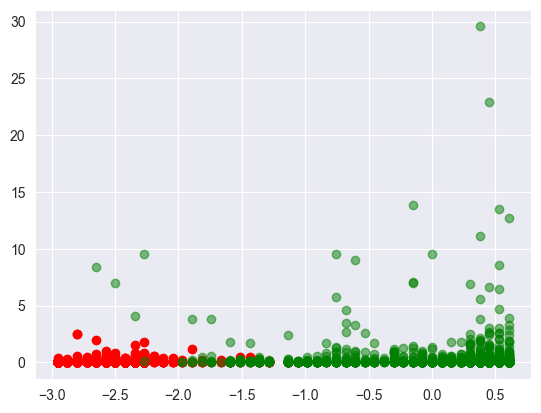

In [80]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

b. Support Vector Classification (SVM)

In [81]:
model = SVC()

In [82]:
model.fit(x_train, y_train)

SVC()

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

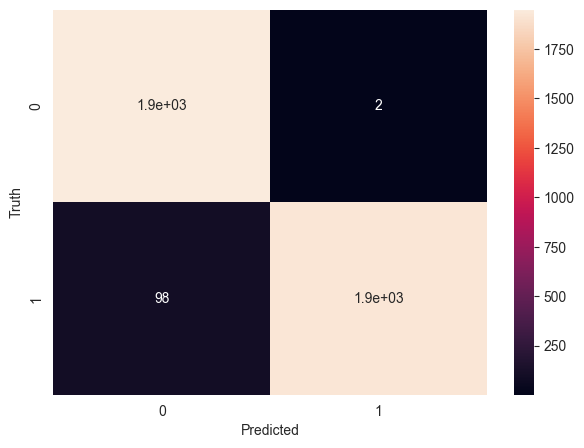

In [83]:
x_test = x_test.drop("Predicted", axis=1)
model.score(x_test, y_test)
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

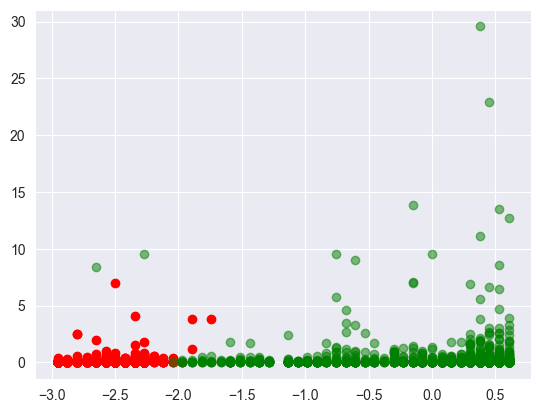

In [84]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)
x_test = x_test.drop("Predicted", axis=1)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1950
           1       1.00      0.95      0.97      2020

    accuracy                           0.97      3970
   macro avg       0.98      0.98      0.97      3970
weighted avg       0.98      0.97      0.97      3970


c. Decision tree

In [86]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
model.score(x_test, y_test)

0.9790931989924433

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

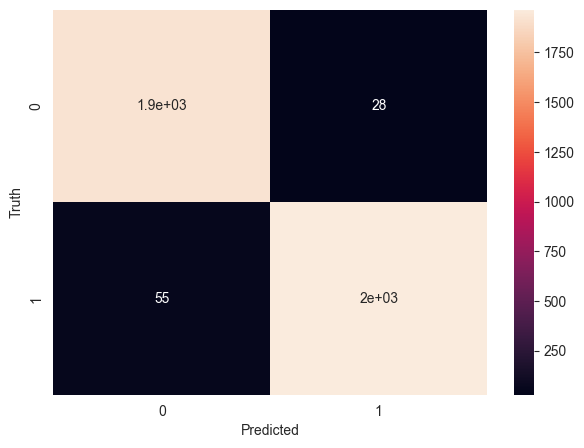

In [88]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

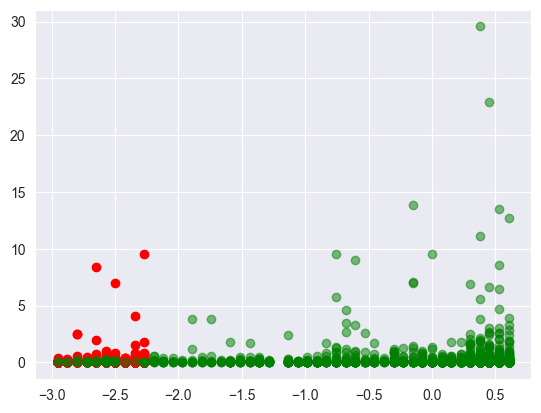

In [89]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)
x_test = x_test.drop("Predicted", axis=1)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1950
           1       0.99      0.97      0.98      2020

    accuracy                           0.98      3970
   macro avg       0.98      0.98      0.98      3970
weighted avg       0.98      0.98      0.98      3970


[Text(0.5625, 0.9, 'iyear <= -2.233\ngini = 0.5\nsamples = 11908\nvalue = [5989, 5919]'),
 Text(0.5, 0.7, 'nperps <= 0.121\ngini = 0.06\nsamples = 6179\nvalue = [5989, 190]'),
 Text(0.25, 0.5, 'nperps <= 0.024\ngini = 0.039\nsamples = 5747\nvalue = [5633, 114]'),
 Text(0.125, 0.3, 'iyear <= -2.309\ngini = 0.034\nsamples = 5331\nvalue = [5240, 91]'),
 Text(0.0625, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.3, 'nkill <= 0.048\ngini = 0.104\nsamples = 416\nvalue = [393, 23]'),
 Text(0.3125, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.5, 'iyear <= -2.385\ngini = 0.29\nsamples = 432\nvalue = [356, 76]'),
 Text(0.625, 0.3, 'iyear <= -2.839\ngini = 0.377\nsamples = 230\nvalue = [172, 58]'),
 Text(0.5625, 0.1, '\n  (...)  \n'),
 Text(0.6875, 0.1, '\n  (...)  \n'),
 Text(0.875, 0.3, 'nwound <= 0.014\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.8125, 0.1, '\n  (...)  \n'),
 Text(0.9375, 0.1, '\n  (...)  \n'),
 Text(0.625

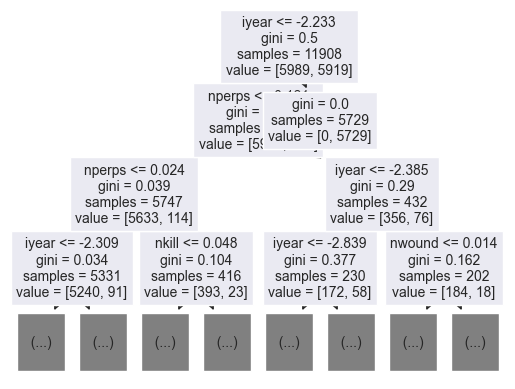

In [92]:
plot_tree(model, max_depth=3, fontsize=10, feature_names=list(x_test.columns))